# STAT 301 Group 13 Project
### #84356377 Yuki Matsushima

In [1]:
library(tidyverse)
library(car)

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




# Individual Assignment 1: Data Description & Exploratory Data Analysis

## (1) Data Description

### Description:
The Sleep Health and Lifestyle Dataset consists of 374 observations and 13 variables related to individuals' sleep habits, physical health, and lifestyle choices. It aims to analyze the factors influencing sleep quality and overall well-being. This dataset is clarified as synthetic and created by Laksika Tharmalingam for illustrative purposes, can be retrieved through Kaggle. (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download)

### Variables:
|Variable Name|Type|Description|
|-------------|----|-----------|
|`Person ID`|Integer|An identifier for each individual.|
|`Gender`|Categorical|The gender of the person (Male/Female).|
|`Age`|Integer|The age of the person in years.|
|`Occupation`|String|The occupation or profession of the person.|
|`Sleep Duration`|Float|The number of hours the person sleeps per day.|
|`Quality of Sleep`|Integer|A subjective rating of the quality of sleep, ranging from 1 to 10.|
|`Physical Activity Level`|Integer|The number of minutes the person engages in physical activity daily.|
|`Stress Level`|Integer|A subjective rating of the stress level experienced by the person, ranging from 1 to 10.|
|`BMI Category`|Categorical|The BMI category of the person (Underweight, Normal, Overweight).|
|`Blood Pressure`|String|The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. (stored as a character)|
|`Heart Rate`|Integer|The resting heart rate of the person in beats per minute.|
|`Daily Steps`|Integer|The number of steps the person takes per day.|
|`Sleep Disorder`|Categorical|The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).|

### Pre-selection Variables
`Person ID` can be discarded since they contain redundant information and won't be needed for future analysis. \
`Occupation` could be discarded too since they are not a health factor, thus would not be useful for prediction of sleep disorders.

## (2) Question

a) ***"Can various health factors predict the likelihood of having a sleep disorder?"*** \
Response: `Sleep Disorder` by converting them into binary values (1 = Yes, 0 = No). Uses Logistic Regression.


b) My question is focused on **prediction** because I aim to build a logistic regression model that estimates the likelihood of having a sleep disorder based on various health factors. By using multiple predictors such as physical activity level and heart rate, the goal is to develop a model that can classify individuals as likely or unlikely to have a sleep disorder. The emphasis is on the model’s predictive accuracy, rather than understanding the causal relationships. 

## (3) Exploratory Data Analysis and Visualization

In [2]:
# read the dataset
sleep_data <- read_csv("https://raw.githubusercontent.com/yma24ma/stat301_project/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv") 

# convert the variable names into snake_case format
colnames(sleep_data) <- gsub(" ", "_", tolower(colnames(sleep_data)))

# split the blood_pressure variable into systolic_bp and diastolic_bp and mutate into a numerical format
sleep_data <- sleep_data |>
separate(blood_pressure, into = c("systolic_bp", "diastolic_bp")) |>
mutate(systolic_bp = as.numeric(systolic_bp),
       diastolic_bp = as.numeric(diastolic_bp))

# mutate bmi_category into "Underweight", "Normal", "Overweight", and "Obese"
# I chose to keep "Obese" since it's recognized by the governemnt of Canada as one of the classification of BMI
sleep_data <- sleep_data |>
mutate(bmi_category = if_else(bmi_category %in% c("Normal", "Normal Weight"), "Normal", bmi_category))


head(sleep_data)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,systolic_bp,diastolic_bp,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140,90,85,3000,Insomnia


Table. 1

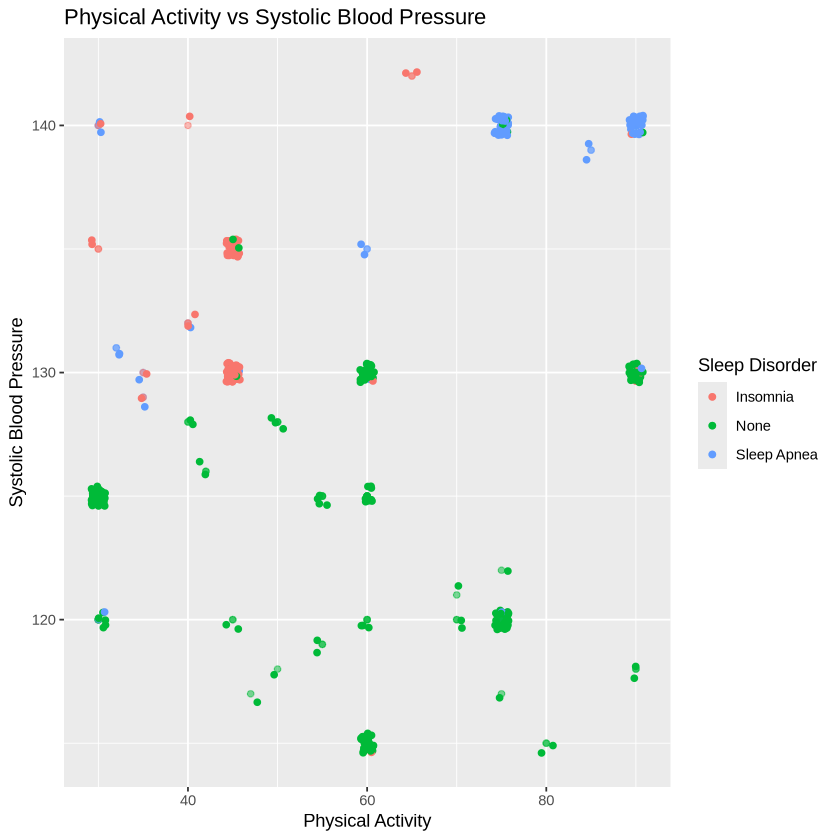

In [3]:
pa_sbp_plot <- sleep_data |>
ggplot(aes(x = physical_activity_level, y = systolic_bp, color = sleep_disorder)) +
geom_point(alpha = 0.5) +
geom_jitter() +
labs(title = "Physical Activity vs Systolic Blood Pressure", x = "Physical Activity", y = "Systolic Blood Pressure", color = "Sleep Disorder")

pa_sbp_plot

Plot. 1

### Interpretation
This plot is relevant to addressing my research question because it visually explores the relationship between physical activity level, systolic blood pressure, and sleep disorders. Since my study aims to predict the likelihood of having a sleep disorder based on various health factors, this visualization helps in understanding wether physical activity and blood pressure level differ among individuals with and without sleep disorders. I chose those variables because they are key health factors that could be associated with sleep disorders and they do not involve subjective rating (such as quality_of_sleep and stress_level) and also are not rounded up or down heavily (such as daily_steps).

From Plot. 1, we can observe potential clustering patterns based on sleep disorder categories. It looks like the people with higher systolic blood pressure tends to have more sleep disorders since most of the blue and red plots are scattered on the top half of the scatter plot. 

-----------------------------------------------------------------------------------------------------------------------------------

# Individual Assignment 2: Methods and Plan & Computational Code and Output

## (1) Methods and Plan

### Method:
To address the research question that I have proposed in assignment 1, "Can various health factors predict the likelihood of having a sleep disorder?", I propose using a logistic regression model as the primary method of analysis. This allows me to make a prediction that estimates the likelihood of having sleep disorder based on multiple health related factors. 

**Why is this method appropriate?** \
This method of using a logistic regression model is appropriate for this analysis since the response variable that I intend to use, `sleep_disorder` is going to be mutated to a binary response, 1 for having sleep disorder and 0 without any sleep disorder. Logistic regression is specifically designed for a binary classification problems, allowing to estimate the odds or the probability of the individual having a sleep disorder or not, which answers my primary question of this project. 

**Which assumptions are required, if any, to apply the method selected?** 
1. Binary Response Variable \
Since I am using a logistic regression model, the most essential assumption is that the response variable must be a binary response, which in this dataset, I will make it a binary response (1 = has sleep disorder, 0 = no sleep disorder). 
2. Independence of Observations \
Each observation should be independent of others, and the data should not include repeated measures on the same individuals, and this data satisfies this assumption since there is a unique identifier for each patient `person_id` that shows each observations are independent. 
3. Linearity in Log-Odds \
The logistic regression model assumes a linear relationship between the log-odds of the response and each predictor, not between the predictors and the response itself.
4. No Multicollinearity \
The predictors should not be highly correlated between each other. This can be assessed using diagnostics such as the Variance Inflation Factor (VIF). 
5. Sufficient Sample Size \
The logistic regression model relies on a large sample to ensure that coefficient estimates, obtained by the maximum likelihood estimation to follow an approximately normal distribution, which are based on the Central Limit Theorem (CLT). Since this dataset has 374 observations and is a reasonably large number of observations, thus satisfying this assumption, reducing the risk of overfitting and improve predictive performance. 

**What are the potential limitations or weaknesses of the method selected?** \
One key limitation of using logistic regression model to answer my predictive question is that, it assumes a linear relationship between the log-odds of the response and the predictors,which may not capture more complex, non-linear patterns in the data. It also assumes that predictors are not highly correlated, and the presence of multicollinearity can make coefficient estimates unstable. Checking the VIF before conducting the analysis and dropping variables that are hihgly correlated would solve this limitation. Additionally, logistic regression can be sensitive to outliers or influential data points.

## (2) Computational Code and Output

In [4]:
# making sleep_disorder binary
sleep_data_binomial <- sleep_data |>
mutate(sleep_disorder = if_else(sleep_disorder == "None", 0, 1)) 

In [5]:
# drop unnecessary variables
sleep_data_clean <- sleep_data_binomial |>
select(-person_id, -occupation)
head(sleep_data_clean)

gender,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,systolic_bp,diastolic_bp,heart_rate,daily_steps,sleep_disorder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,27,6.1,6,42,6,Overweight,126,83,77,4200,0
Male,28,6.2,6,60,8,Normal,125,80,75,10000,0
Male,28,6.2,6,60,8,Normal,125,80,75,10000,0
Male,28,5.9,4,30,8,Obese,140,90,85,3000,1
Male,28,5.9,4,30,8,Obese,140,90,85,3000,1
Male,28,5.9,4,30,8,Obese,140,90,85,3000,1


In [6]:
# creating a logistic model
logistic_model <- glm(sleep_disorder ~ ., data = sleep_data_clean, family = binomial) 
logistic_model


Call:  glm(formula = sleep_disorder ~ ., family = binomial, data = sleep_data_clean)

Coefficients:
            (Intercept)               genderMale                      age  
             -8.4419858                0.2884119                0.1521916  
         sleep_duration         quality_of_sleep  physical_activity_level  
              0.2991768               -1.8210628               -0.0034378  
           stress_level        bmi_categoryObese   bmi_categoryOverweight  
             -0.1771425               17.9380866                0.7776185  
            systolic_bp             diastolic_bp               heart_rate  
             -0.0951715                0.3646945               -0.0657314  
            daily_steps  
             -0.0001375  

Degrees of Freedom: 373 Total (i.e. Null);  361 Residual
Null Deviance:	    507.5 
Residual Deviance: 186.8 	AIC: 212.8

In [7]:
# Check VIF for multicollinearity
vif(logistic_model)

,GVIF,Df,GVIF^(1/(2*Df))
gender,4.179207,1,2.044311
age,10.061078,1,3.171920
sleep_duration,13.313895,1,3.648821
quality_of_sleep,14.228216,1,3.772031
physical_activity_level,7.717762,1,2.778086
stress_level,16.768170,1,4.094896
bmi_category,5.706744,2,1.545600
systolic_bp,43.388728,1,6.587012
diastolic_bp,50.764208,1,7.124901
heart_rate,5.553143,1,2.356511


Variable selection will be omitted for this assignment, but will be done for the final project

### Visualization

`geom_smooth()` using formula = 'y ~ x'


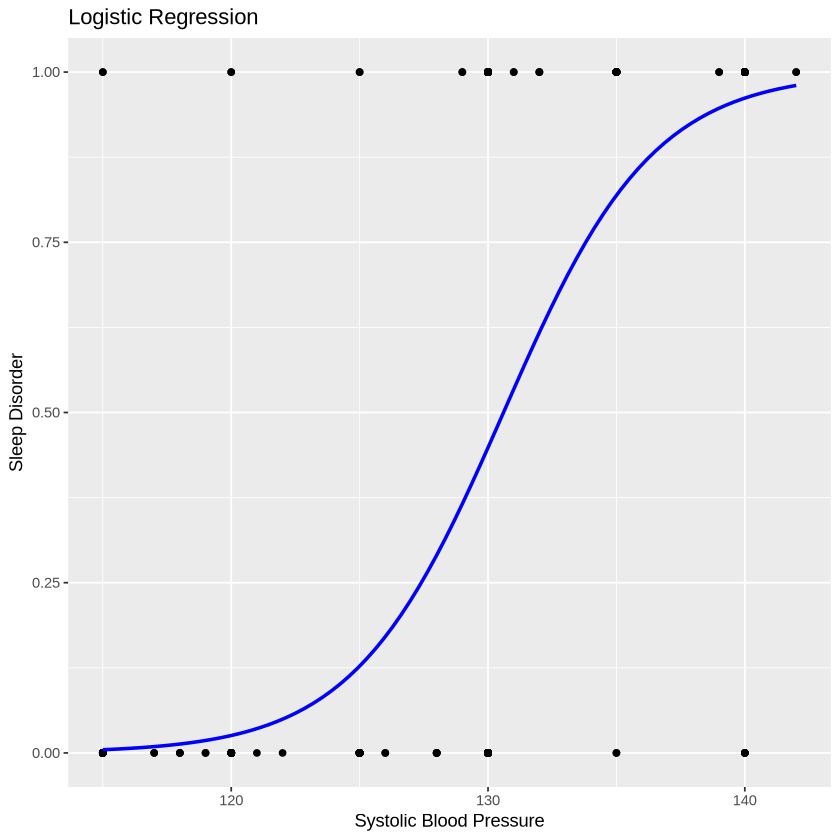

In [69]:
sleep_logistic_plot <- sleep_data_clean |>
ggplot(aes(x = systolic_bp, y = sleep_disorder)) +
geom_point() +
geom_smooth(method = "glm", method.args = c(family = binomial), se = FALSE, color = "blue") +
labs(title = "Logistic Regression", x = "Systolic Blood Pressure", y = "Sleep Disorder")
sleep_logistic_plot